<a href="https://colab.research.google.com/github/rhirwa/ml_toolkits/blob/main/hello_world_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target

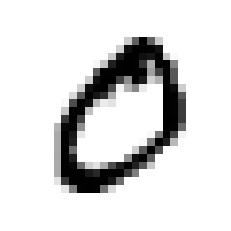

In [ ]:
#check one image 
import matplotlib.pyplot as plt 
def plt_image(image_data):
  image = image_data.reshape(28, 28)
  plt.imshow(image, cmap='binary')
  plt.axis('off')
random_digit = X[1]
plt_image(random_digit)
plt.show()

In [ ]:
# splitting the dataset, a small model 
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
from sklearn.linear_model import SGDClassifier
y_train_0 = (y_train == '0')
y_test_0 = (y_test == '0')
sgc_clf = SGDClassifier(random_state = 1)
sgc_clf.fit(X_train, y_train_0)
sgc_clf.predict([random_digit])

array([ True])

In [ ]:
#cross validation 
from sklearn.model_selection import cross_val_score 
cross_val_score(sgc_clf, X_train, y_train_0, cv = 3, scoring='accuracy')
#best way to check accuracy for classifiers is to use confusion matrix

array([0.98855, 0.98975, 0.9878 ])

In [ ]:
# a custom cross validation score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is
                                       # not already shuffled
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(sgc_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_0[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_0[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.95035, 0.96035, and 0.9604


0.98855
0.98975
0.9878


In [ ]:
#confusion matrices 
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgc_clf, X_train, y_train_0, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_0, y_train_pred)
cm

array([[53751,   326],
       [  352,  5571]])

In [ ]:
#precision and recall 
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred)
recall_score(y_train_0, y_train_pred)

0.9405706567617761

In [ ]:
#combine both precision and recall with f1
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.9426395939086294

In [ ]:
#precision/recall tradeoff, set threshold 
y_scores = sgc.classifier.decision_function([random_digit])
threshold = 3000
y_some_digit_pred = (y_scores > threshold)

In [ ]:
#return scores 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")


In [ ]:
#precision and recall for all possible thresholds 
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
[...]  # beautify the figure: add grid, legend, axis, labels, and circles
plt.show()

In [ ]:
#shooting for a particular precision
idx_for_90_precision = (precisions >= 0.9).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

In [ ]:
#another way to make predictions 
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_0, y_train_pred_90)
recall_at_90_precision = recall_score(y_train_0, y_train_pred_90)
recall_at_90_precision

In [ ]:
#roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [ ]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
[...]  # beautify the figure: add labels, grid, legend, arrow, and text
plt.show()

In [ ]:
#compare classifiers
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

In [ ]:
#trying a random forest classifier 
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state = 41)

In [ ]:
#get probabilities for each instance
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3
                             method='predict_proba')
y_probas_forest[:2]

In [ ]:
y_scores_forest = y_probas_forest[:1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_0, y_scores_forest)

In [ ]:
#plot both sgd and random forest
plt.plot(recalls_forest, precisions_forest,'b-', linewidth=2,
         label = 'Random Forest')
plt.plot(recalls, precisions, '--', linewidth=2, 
         label='SGD')
plt.show

In [ ]:
#f1 and auc scores
y_train_pred_forest = y_probas_forest[:, 1]
f1_score(y_train_0, y_pred_forest)
roc_auc_score(y_train_0, y_scores_forest)

In [ ]:
#binary classifier on multiple classes
from sklearn.svm import SVC
svm_clf = SVC(random_state = 4)
svm_clf.fit(X_train[:2000], y_train[:2000])

In [ ]:
#predict and check scores
svm_clf.predict([random_digit])
random_digit_scores = svm_clf.decision_function([random_digit]).round(2)
#look up class label
svm_clf.classes_[random_digit_scores.argmax()]

In [ ]:
#controlling ovo and ovr
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state = 42))
ovr_clf.fit(X_train[:2000], y_train[:2000])
ovr_clf.predict([random_digit])

In [ ]:
#analyzing errors
from sklearn.metrics import ConfusionMatrixDisplay 
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)

In [ ]:
#normalize confusion matrix
ConfusionMatrixDisplay.from_predictions(X_train, y_train_pred,
                                        normalize='True', values_format='.0%')

In [ ]:
#make errors stand out more 
sample_weight = (y_train_pred != y_train)
ConfusionMatrixDisplay.from_predictions(X_train, y_train_pred,
                                        sample_weight = sample_weight
                                        normalize = 'True', values_format='.0%')

In [ ]:
#multilabel classification
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1 )
y_multilabel = np.c_(y_train_large, y_train_odd)

kneigbors = KNeighborsClassifier()
kneighbors.fit(X_train, y_multilabel)

In [ ]:
#chain classifier
from sklearn.multioutput import ClassifierChain
chain_clf = ClassifierChain(SVC(), cv = 3, random_state = 42)
chain_clf.fit(X_train[:2000], y_multilabel[:2000])
chain_clf.predict([random_digit])

In [ ]:
#multiouput classification 
np.random.seed(42)
noise = np.random.randint(0, 100, len(X_train), 784)
X_train_mod = Xtrain + noise
noise = np.random.randint(0, 100, len(X_test), 784)
X_test_mod = noise + X_test
y_train_mod = X_train
y_test_mod = y_test

In [ ]:
#clean up using a classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_image = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_image)
plt.show()